This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-06-14 10:07:36.606561: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-14 10:07:36.606714: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/10


2022-06-14 10:07:37.036222: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-06-14 10:07:37.558066: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


373/375 [============================>.] - ETA: 0s - loss: 0.6266 - accuracy: 0.8110

2022-06-14 10:07:41.901777: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 5s 8ms/step - loss: 0.6250 - accuracy: 0.8114 - val_loss: 0.3939 - val_accuracy: 0.8777
Epoch 2/10
375/375 [==============================] - 3s 7ms/step - loss: 0.2482 - accuracy: 0.9234 - val_loss: 0.2103 - val_accuracy: 0.9352
Epoch 3/10
375/375 [==============================] - 3s 7ms/step - loss: 0.1619 - accuracy: 0.9497 - val_loss: 0.1516 - val_accuracy: 0.9556
Epoch 4/10
375/375 [==============================] - 3s 7ms/step - loss: 0.1163 - accuracy: 0.9642 - val_loss: 0.1458 - val_accuracy: 0.9567
Epoch 5/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0853 - accuracy: 0.9730 - val_loss: 0.1256 - val_accuracy: 0.9639
Epoch 6/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0649 - accuracy: 0.9793 - val_loss: 0.1443 - val_accuracy: 0.9596
Epoch 7/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0479 - accuracy: 0.9855 - val_loss: 0.1417 - val_accuracy: 0.9614
Epoch 8/10
375/37

2022-06-14 10:08:07.165906: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


368/375 [============================>.] - ETA: 0s - loss: 0.2945 - accuracy: 0.9150

2022-06-14 10:08:09.730540: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 3s 8ms/step - loss: 0.2919 - accuracy: 0.9157 - val_loss: 0.1537 - val_accuracy: 0.9563
Epoch 2/10
375/375 [==============================] - 3s 7ms/step - loss: 0.1167 - accuracy: 0.9656 - val_loss: 0.1117 - val_accuracy: 0.9666
Epoch 3/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0761 - accuracy: 0.9770 - val_loss: 0.0857 - val_accuracy: 0.9739
Epoch 4/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0544 - accuracy: 0.9837 - val_loss: 0.0884 - val_accuracy: 0.9743
Epoch 5/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0409 - accuracy: 0.9884 - val_loss: 0.0831 - val_accuracy: 0.9759
Epoch 6/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0307 - accuracy: 0.9910 - val_loss: 0.0792 - val_accuracy: 0.9779
Epoch 7/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0238 - accuracy: 0.9929 - val_loss: 0.0804 - val_accuracy: 0.9780
Epoch 8/10
375/37

**Plotting a validation accuracy comparison**

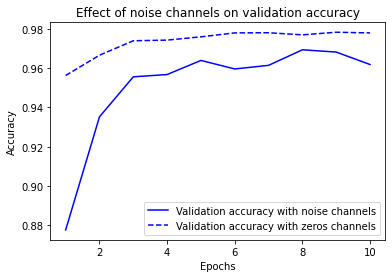

In [3]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [4]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
 17/375 [>.............................] - ETA: 2s - loss: 2.3841 - accuracy: 0.1071

2022-06-14 10:08:44.097837: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


371/375 [============================>.] - ETA: 0s - loss: 2.3181 - accuracy: 0.1029

2022-06-14 10:08:46.400243: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 3s 7ms/step - loss: 2.3180 - accuracy: 0.1031 - val_loss: 2.3065 - val_accuracy: 0.1022
Epoch 2/100
375/375 [==============================] - 2s 6ms/step - loss: 2.3009 - accuracy: 0.1134 - val_loss: 2.3107 - val_accuracy: 0.1009
Epoch 3/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2915 - accuracy: 0.1282 - val_loss: 2.3196 - val_accuracy: 0.1019
Epoch 4/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2782 - accuracy: 0.1375 - val_loss: 2.3271 - val_accuracy: 0.1034
Epoch 5/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2607 - accuracy: 0.1522 - val_loss: 2.3355 - val_accuracy: 0.1023
Epoch 6/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2402 - accuracy: 0.1676 - val_loss: 2.3481 - val_accuracy: 0.1008
Epoch 7/100
375/375 [==============================] - 2s 7ms/step - loss: 2.2158 - accuracy: 0.1823 - val_loss: 2.3670 - val_accuracy: 0.1044
Epoch 8/100

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
 17/375 [>.............................] - ETA: 2s - loss: 18080.5137 - accuracy: 0.5005

2022-06-14 10:12:52.846086: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


366/375 [============================>.] - ETA: 0s - loss: 864.9416 - accuracy: 0.4167

2022-06-14 10:12:55.059761: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 3s 7ms/step - loss: 844.4446 - accuracy: 0.4133 - val_loss: 2.6510 - val_accuracy: 0.3022
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 3.0815 - accuracy: 0.2571 - val_loss: 2.0055 - val_accuracy: 0.2436
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 3.3418 - accuracy: 0.2575 - val_loss: 4.2558 - val_accuracy: 0.3072
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 3.6109 - accuracy: 0.2596 - val_loss: 2.0855 - val_accuracy: 0.2183
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 2.7326 - accuracy: 0.2507 - val_loss: 2.6725 - val_accuracy: 0.2521
Epoch 6/10
375/375 [==============================] - 2s 7ms/step - loss: 2.6153 - accuracy: 0.2409 - val_loss: 2.1534 - val_accuracy: 0.2245
Epoch 7/10
375/375 [==============================] - 3s 7ms/step - loss: 2.5754 - accuracy: 0.2756 - val_loss: 2.0998 - val_accuracy: 0.2367
Epoch 8/10
375/

**The same model with a more appropriate learning rate**

In [6]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
 18/375 [>.............................] - ETA: 2s - loss: 2.6753 - accuracy: 0.6072

2022-06-14 10:13:20.660109: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


369/375 [============================>.] - ETA: 0s - loss: 0.3704 - accuracy: 0.9093

2022-06-14 10:13:22.992628: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 3s 7ms/step - loss: 0.3670 - accuracy: 0.9102 - val_loss: 0.1887 - val_accuracy: 0.9497
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1413 - accuracy: 0.9639 - val_loss: 0.1481 - val_accuracy: 0.9658
Epoch 3/10
375/375 [==============================] - 2s 7ms/step - loss: 0.1132 - accuracy: 0.9731 - val_loss: 0.1769 - val_accuracy: 0.9645
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0996 - accuracy: 0.9777 - val_loss: 0.1707 - val_accuracy: 0.9702
Epoch 5/10
375/375 [==============================] - 2s 7ms/step - loss: 0.0899 - accuracy: 0.9809 - val_loss: 0.2078 - val_accuracy: 0.9714
Epoch 6/10
375/375 [==============================] - 2s 7ms/step - loss: 0.0859 - accuracy: 0.9837 - val_loss: 0.2214 - val_accuracy: 0.9704
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0746 - accuracy: 0.9858 - val_loss: 0.2182 - val_accuracy: 0.9743
Epoch 8/10
375/37

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [7]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
  1/375 [..............................] - ETA: 1:43 - loss: 2.3993 - accuracy: 0.0781

2022-06-14 10:14:06.190995: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


367/375 [============================>.] - ETA: 0s - loss: 0.6900 - accuracy: 0.8264

2022-06-14 10:14:08.129651: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 2s 6ms/step - loss: 0.6831 - accuracy: 0.8280 - val_loss: 0.3590 - val_accuracy: 0.9030
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.3518 - accuracy: 0.9029 - val_loss: 0.3087 - val_accuracy: 0.9135
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.3155 - accuracy: 0.9128 - val_loss: 0.2897 - val_accuracy: 0.9199
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.2995 - accuracy: 0.9156 - val_loss: 0.2819 - val_accuracy: 0.9217
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.2897 - accuracy: 0.9190 - val_loss: 0.2767 - val_accuracy: 0.9232
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.2831 - accuracy: 0.9207 - val_loss: 0.2721 - val_accuracy: 0.9257
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.2780 - accuracy: 0.9225 - val_loss: 0.2691 - val_accuracy: 0.9260
Epoch 8/20
375/37

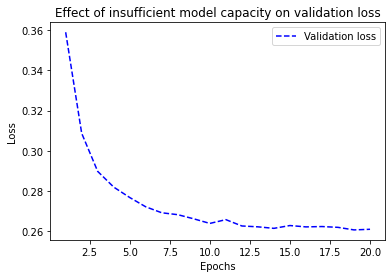

In [8]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [9]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20


2022-06-14 10:14:53.430693: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - ETA: 0s - loss: 0.3604 - accuracy: 0.8966

2022-06-14 10:14:56.169633: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 3s 7ms/step - loss: 0.3604 - accuracy: 0.8966 - val_loss: 0.1861 - val_accuracy: 0.9462
Epoch 2/20
375/375 [==============================] - 3s 7ms/step - loss: 0.1596 - accuracy: 0.9518 - val_loss: 0.1371 - val_accuracy: 0.9603
Epoch 3/20
375/375 [==============================] - 3s 7ms/step - loss: 0.1127 - accuracy: 0.9662 - val_loss: 0.1166 - val_accuracy: 0.9648
Epoch 4/20
375/375 [==============================] - 2s 7ms/step - loss: 0.0879 - accuracy: 0.9731 - val_loss: 0.1110 - val_accuracy: 0.9672
Epoch 5/20
375/375 [==============================] - 3s 7ms/step - loss: 0.0700 - accuracy: 0.9780 - val_loss: 0.1007 - val_accuracy: 0.9715
Epoch 6/20
375/375 [==============================] - 3s 7ms/step - loss: 0.0577 - accuracy: 0.9821 - val_loss: 0.0939 - val_accuracy: 0.9733
Epoch 7/20
375/375 [==============================] - 2s 7ms/step - loss: 0.0474 - accuracy: 0.9853 - val_loss: 0.0947 - val_accuracy: 0.9738
Epoch 8/20
375/37

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [10]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20


2022-06-14 10:15:53.026390: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 3s 44ms/step - loss: 0.5020 - accuracy: 0.7904 - val_loss: 0.3680 - val_accuracy: 0.8774
Epoch 2/20
 1/30 [>.............................] - ETA: 0s - loss: 0.3289 - accuracy: 0.9258

2022-06-14 10:15:55.058747: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 0s 15ms/step - loss: 0.3000 - accuracy: 0.8995 - val_loss: 0.2970 - val_accuracy: 0.8910
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2164 - accuracy: 0.9307 - val_loss: 0.2795 - val_accuracy: 0.8897
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1744 - accuracy: 0.9442 - val_loss: 0.2752 - val_accuracy: 0.8883
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1392 - accuracy: 0.9571 - val_loss: 0.2796 - val_accuracy: 0.8901
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1186 - accuracy: 0.9622 - val_loss: 0.3442 - val_accuracy: 0.8701
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0951 - accuracy: 0.9724 - val_loss: 0.3114 - val_accuracy: 0.8843
Epoch 8/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0783 - accuracy: 0.9775 - val_loss: 0.3421 - val_accuracy: 0.8793
Epoch 9/20
30/30 [======

**Version of the model with lower capacity**

In [11]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20


2022-06-14 10:16:07.663372: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 2s 37ms/step - loss: 0.5672 - accuracy: 0.7599 - val_loss: 0.4673 - val_accuracy: 0.8479
Epoch 2/20
 1/30 [>.............................] - ETA: 0s - loss: 0.4403 - accuracy: 0.8750

2022-06-14 10:16:08.986408: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 0s 15ms/step - loss: 0.3975 - accuracy: 0.8875 - val_loss: 0.3753 - val_accuracy: 0.8776
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3060 - accuracy: 0.9167 - val_loss: 0.3247 - val_accuracy: 0.8846
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2482 - accuracy: 0.9301 - val_loss: 0.2969 - val_accuracy: 0.8880
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2080 - accuracy: 0.9413 - val_loss: 0.2841 - val_accuracy: 0.8895
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1788 - accuracy: 0.9503 - val_loss: 0.2818 - val_accuracy: 0.8866
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1557 - accuracy: 0.9575 - val_loss: 0.2854 - val_accuracy: 0.8842
Epoch 8/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1382 - accuracy: 0.9627 - val_loss: 0.2773 - val_accuracy: 0.8891
Epoch 9/20
30/30 [======

**Version of the model with higher capacity**

In [12]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20


2022-06-14 10:16:24.085277: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 0.5504 - accuracy: 0.7570

2022-06-14 10:16:26.031825: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 3s 62ms/step - loss: 0.5504 - accuracy: 0.7570 - val_loss: 0.3216 - val_accuracy: 0.8727
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2567 - accuracy: 0.9021 - val_loss: 0.2647 - val_accuracy: 0.8978
Epoch 3/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1731 - accuracy: 0.9351 - val_loss: 0.2746 - val_accuracy: 0.8923
Epoch 4/20
30/30 [==============================] - 1s 30ms/step - loss: 0.0778 - accuracy: 0.9727 - val_loss: 0.4289 - val_accuracy: 0.8693
Epoch 5/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1011 - accuracy: 0.9799 - val_loss: 0.3428 - val_accuracy: 0.8842
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.0061 - accuracy: 0.9994 - val_loss: 0.5026 - val_accuracy: 0.8889
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 7.8824e-04 - accuracy: 0.9999 - val_loss: 0.6162 - val_accuracy: 0.8859
Epoch 8/20
30/30 [==

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [13]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20


2022-06-14 10:16:46.263075: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 0.5754 - accuracy: 0.7896

2022-06-14 10:16:47.609745: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 2s 39ms/step - loss: 0.5754 - accuracy: 0.7896 - val_loss: 0.4398 - val_accuracy: 0.8785
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3829 - accuracy: 0.8941 - val_loss: 0.3925 - val_accuracy: 0.8764
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3202 - accuracy: 0.9181 - val_loss: 0.3612 - val_accuracy: 0.8892
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2906 - accuracy: 0.9282 - val_loss: 0.3588 - val_accuracy: 0.8855
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2677 - accuracy: 0.9379 - val_loss: 0.3555 - val_accuracy: 0.8872
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2579 - accuracy: 0.9376 - val_loss: 0.3664 - val_accuracy: 0.8825
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2506 - accuracy: 0.9405 - val_loss: 0.3749 - val_accuracy: 0.8807
Epoch 8/20
30/30 [======

**Different weight regularizers available in Keras**

In [14]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [15]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20


2022-06-14 10:17:01.753366: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 0.6127 - accuracy: 0.6611

2022-06-14 10:17:02.952769: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 2s 39ms/step - loss: 0.6127 - accuracy: 0.6611 - val_loss: 0.4683 - val_accuracy: 0.8537
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.4825 - accuracy: 0.7904 - val_loss: 0.3789 - val_accuracy: 0.8619
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.4006 - accuracy: 0.8405 - val_loss: 0.3095 - val_accuracy: 0.8855
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3405 - accuracy: 0.8785 - val_loss: 0.2842 - val_accuracy: 0.8890
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2901 - accuracy: 0.9011 - val_loss: 0.2785 - val_accuracy: 0.8875
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2569 - accuracy: 0.9152 - val_loss: 0.2741 - val_accuracy: 0.8902
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2190 - accuracy: 0.9330 - val_loss: 0.2788 - val_accuracy: 0.8913
Epoch 8/20
30/30 [======

## Summary